<a href="https://colab.research.google.com/drive/1tElT3FhddabqCyJKFH27rhnyXJTqrzke?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Press [here](https://drive.google.com/file/d/1Z39LNnF4lOj4iT48YDYFZNPDBglMd0TZ/view?usp=sharing) to download the dataset.

In [ ]:
all_data = pd.read_csv('/content/drive/MyDrive/forest_dataset.csv')
all_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

# Homework

The quality of classification/regression by the k Nearest Neighbors method depends on several parameters:
* the number of neighbors `n_neighbors`
* the distance metric between objects `metric`
* the weights of neighbors (the neighbors of the test example can enter with different weights, for example, the further the example, the less its "voice" is taken into account) `weights`


Train the `KNeighborsClassifier` on the dataset.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier()
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)
# Your code here

Let's select the parameters of our model:

* Iterate over the grid from `1` to `10` for the number of neighbors parameter
* Also, try using different metrics: `['manhattan', 'euclidean']`
* Try using different weight calculation strategies: `[‘uniform’, ‘distance’]`

In [ ]:
from sklearn.model_selection import GridSearchCV
params = { 'n_neighbors': range(1,11),
            'metric' : ['manhattan', 'euclidean'],
            'weights' : ['uniform', 'distance']
          }

clf_grid = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='accuracy', n_jobs=-1)
clf_grid.fit(train_feature_matrix, train_labels)
y_pred_grid = clf.predict(test_feature_matrix)

Let's output the best parameters

In [ ]:
clf_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

Using the optimal number of neighbors found, calculate the probabilities of belonging to classes for the test sample (`.predict_proba`).

In [ ]:
optimal_clf = clf_grid.best_estimator_
pred_prob = optimal_clf.predict_proba(test_feature_matrix)

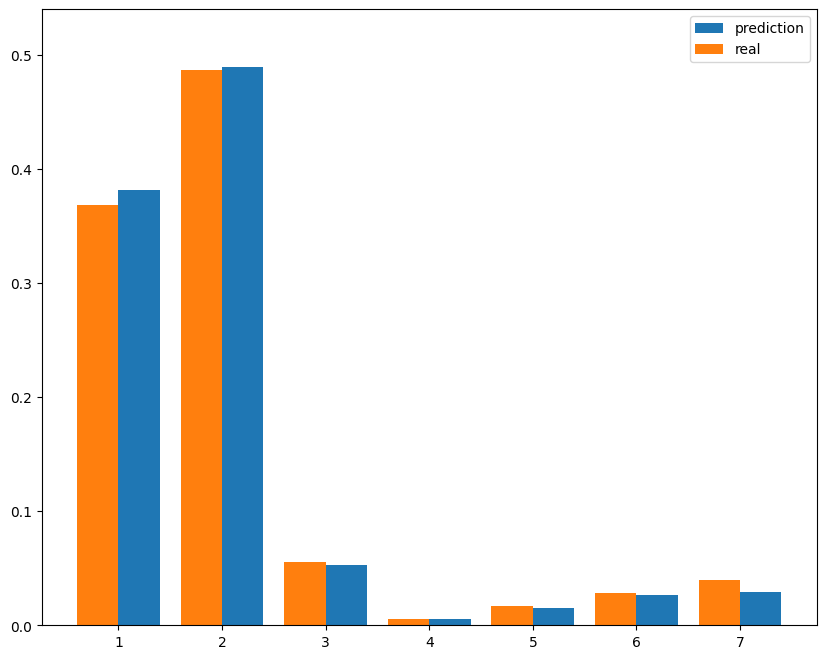

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

## Conclusion

What is the quality of the model on the test sample? Compare it with the quality of logistic regression. Which model is better? Why? What are the pros and cons of the k Nearest Neighbors method? Plot the ROC curve for the k Nearest Neighbors method. Calculate the area under the ROC curve (AUC-ROC).

As we can see on the bar plot, the quality seems to be pretty good (predicted ratios of classes and the real ones are close to each other).

In [20]:
clf_logreg_ovr=LogisticRegression(multi_class='ovr')
clf_logreg_ovr.fit(train_feature_matrix, train_labels)
y_pred_logreg_ovr=clf_logreg_ovr.predict(test_feature_matrix)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
clf_logreg_softmax=LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf_logreg_softmax.fit(train_feature_matrix, train_labels)
y_pred_logreg_softmax=clf_logreg_softmax.predict(test_feature_matrix)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
print(f'Accuracy of log. reg. One vs Rest: {accuracy_score(y_pred_logreg_ovr, test_labels)}')
print(f'Accuracy of log. reg. Softmax: {accuracy_score(y_pred_logreg_softmax, test_labels)}')
print(f'Accuracy of GridSeach: {accuracy_score(y_pred_grid, test_labels)}')

Accuracy of log. reg. One vs Rest: 0.6075
Accuracy of log. reg. Softmax: 0.6075
Accuracy of GridSeach: 0.7365


Comparing to optimal kNN, logistic regression performs poorly. I assume this happens because the hyperparameters of kNN were based on GridSearch.

In [30]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score

In [40]:
y_test_bin = label_binarize(test_labels, classes=np.unique(train_labels))
n_classes = y_test_bin.shape[1]
print(y_test_bin)
print(pred_prob)
fpr = dict() #false positive rate
tpr = dict() #true positive rate
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], pred_prob[:, i])

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
[[0.         1.         0.         ... 0.         0.         0.        ]
 [0.73117861 0.26882139 0.         ... 0.         0.         0.        ]
 [0.27814042 0.72185958 0.         ... 0.         0.         0.        ]
 ...
 [1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.54264548 0.         0.         ... 0.         0.         0.45735452]]


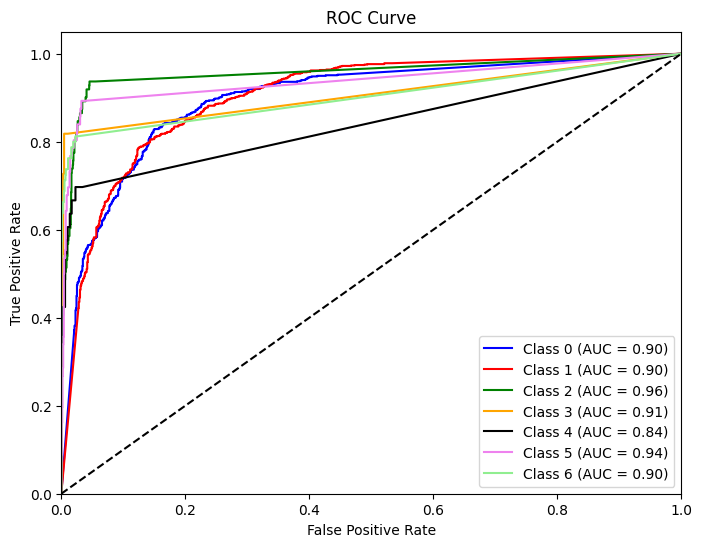

In [43]:
plt.figure(figsize=(8, 6))

colors= ['blue', 'red', 'green', 'orange', 'black', 'violet', 'lightgreen']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [44]:
macro_auc = roc_auc_score(y_test_bin, pred_prob, multi_class='ovr', average='macro')
print(f"Macro-average AUC: {macro_auc:.4f}")

Macro-Average AUC: 0.9063


In [45]:
micro_auc = roc_auc_score(y_test_bin, pred_prob, multi_class='ovr', average='micro')
print(f"Micro-average AUC: {micro_auc:.4f}")

Micro-Average AUC: 0.9559


kNN method demands thoroughly picked parameters (k affects the performance greatly), so it's better to apply GridSearch. Also we have to store all the training data to calculate the distances, so kNN may not be suitable for very large datasets. As for pros, this method is suitable for situations when the data is constantly updated, becauce there's no need to retrain the model when a new element is added to the dataframe.